# Explore here

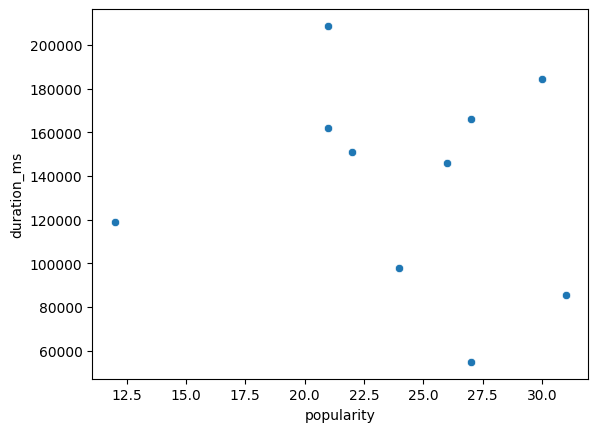

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
import seaborn as sns
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()


client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')


conexion = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

id_artista = "1yLrA8a9c6qikBV0THGnux"

response = conexion.artist_top_tracks("1yLrA8a9c6qikBV0THGnux")
tracks = []
for track in response["tracks"]:
  tracks.append({
            "name": track["name"],
            "popularity": track["popularity"],
            "duration_ms": track["duration_ms"]
})
tracks_df = pd.DataFrame.from_records(tracks)
tracks_df.sort_values(["popularity"], inplace = True)

scatter_plot = sns.scatterplot(data = tracks_df, x = "popularity", y = "duration_ms")
fig = scatter_plot.get_figure()
fig.savefig("scatter_plot.png")

